# (28) Register func -- q_bold too large?

**Motivation**: ```q_bold``` was 0.05, but we get too many missing ROIs. Now fitting with ```q_bold=0.01```. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display, Latex

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
# HIDE CODE


def default_props_anesth(
        num_k: int = 7,
        perc: int = 15,
        **kwargs, ):
    mice = Mice(512)
    mice.set_kws(
        desc_ca2='preproc',
        desc_bold='rabies-hp',
    )
    props_base = {
        'mice': mice,
        'num_k': num_k,
        'task': 'rest',
        'perc': f'p{perc}-sample',
        'metric': 'pearson',
        'sv_props': {
            'match_using': 'gam',
            'match_metric': 'euclidean'},
        'graph_type': 'real',
        'kw_kmeans': {'n_init': 100},
        'verbose': False,
    }
    kwargs = setup_kwargs(props_base, kwargs)
    props_ca = {'mode': 'ca2', **kwargs}
    return mice, props_ca

## Prep

In [3]:
from register.register import Register

mice = Mice(
    cfg=512,
    full_load=True,
    load_parcel=True,
    load_allen=True,
)
print(mice.kws)

self = reg = Register(mice)
self.roi_thres, self.roi_cutoff

{
    'task': 'rest',
    'exclude': True,
    'runs_only': True,
    'band_ca2': (0.01, 5.0),
    'band_bold': (0.01, 0.5),
    'desc_ca2': 'preproc',
    'desc_bold': 'rabies-hp'
}

(0.2, 0)

In [4]:
logger = make_logger(
    name='different_q-bold',
    path=self.mice.cfg.log_dir,
    verbose=self.verbose,
    module=__name__,
)

logger 'different_q-bold_(2023_08_28).log' created at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/log

In [5]:
q_bold = 0.01

tsnr_masks = self.get_tsnr_masks(
    q_bold=q_bold)

Name: brain . . . a total of: 6017 regions accepted, 265 regions rejected.
accept ratio: 95.78 %, reject ratio: 4.22 %, using a presence threshold of 20.0 %

In [6]:
mode = 'bold'
desc = 'rabies-hp'

self.set_mode(mode)
accepted = self.get_accepted_regions()
accepted = accepted['acc']

kws = {f"desc_{mode}": desc}
self.mice.setup_preproc_data(**kws)
self._organize_func(
    tsnr_masks=tsnr_masks[mode],
    accepted_regions=accepted,
    description=desc,
    logger=logger,
)

Name: brain . . . a total of: 6017 regions accepted, 265 regions rejected.
accept ratio: 95.78 %, reject ratio: 4.22 %, using a presence threshold of 20.0 %

Organizing sub-SLC10_ses-3_run-7 (bold / rabies-hp): 100%|██████████| 210/210 [58:30<00:00, 16.72s/it]


In [18]:
lookup = mice.node_lookup.copy()
lookup[mode] = {
    i: region for i, region
    in enumerate(accepted)
}

In [19]:
save_obj(
    obj=lookup,
    file_name='roi_lookup',
    save_dir=self.mice.cfg.main_dir,
    verbose=self.verbose,
    mode='npy',
)

[PROGRESS] 'roi_lookup.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/roi_lookup.npy'

## Brough over from tmp

In [20]:
from register.register import Register

mice = Mice(
    cfg=512,
    full_load=True,
    load_parcel=True,
    load_allen=True,
)
print(mice.kws)

bs = Base(mice, mode='ca2')
reg = Register(mice)

{
    'task': 'rest',
    'exclude': True,
    'runs_only': True,
    'band_ca2': (0.01, 5.0),
    'band_bold': (0.01, 0.5),
    'desc_ca2': 'preproc',
    'desc_bold': 'rabies-hp'
}

In [21]:
len(mice.bold)

114

In [22]:
bad_all = []
for key in mice.bold:
    data = Base(
        mice,
        key=key,
        mode='bold-lite',
        prep_data=True,
    ).data
    bad = np.isnan(data).sum(1) > 0
    bad_all.append(bad.sum())

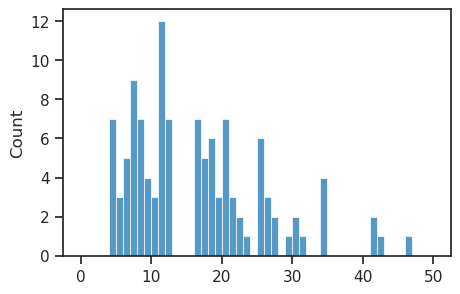

In [23]:
sns.histplot(bad_all, bins=np.linspace(0, 50, 51));

In [24]:
bsbo = Base(mice, mode='bold')

In [25]:
key = 'sub-SLC01_ses-3_run-3'

In [26]:
data = Base(
    mice,
    key=key,
    mode='bold',
    prep_data=True,
).data
bad = np.isnan(data).sum(1) > 0
bad.sum()

232

In [27]:
data.shape

(6017, 499)

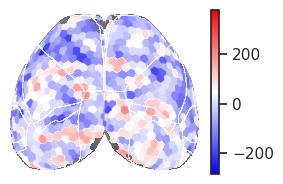

In [28]:
t = 120
bsbo.show(
    data[:, t],
    figsize=(3, 2),
    vmin=np.nanmin(data[:, t]),
    vmax=np.nanmax(data[:, t]),
    mask_thresh=None,
    cmap='bwr',
    cbar=True,
    layer=0,
);

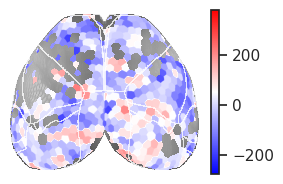

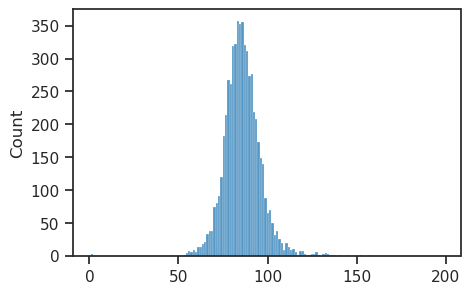

In [31]:
x = np.nanstd(data, axis=-1)
sns.histplot(x);

<Axes: ylabel='Count'>

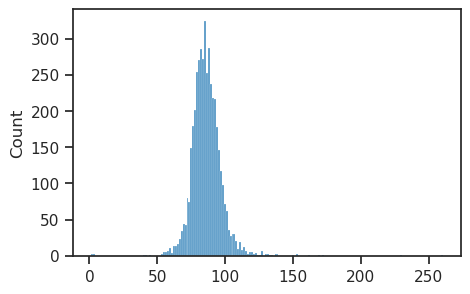

In [35]:
np.isnan(x).sum()

232

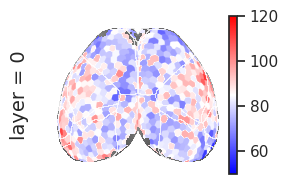

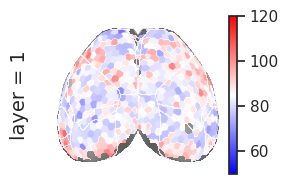

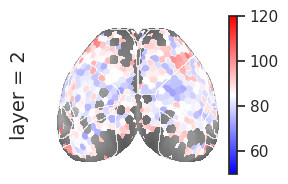

In [37]:
for ll in [0, 1, 2]:
    bsbo.show(
        {f"layer = {ll}": x},
        figsize=(3, 2),
        vmin=50,
        vmax=120,
        mask_thresh=None,
        cmap='bwr',
        cbar=True,
        layer=ll,
    );

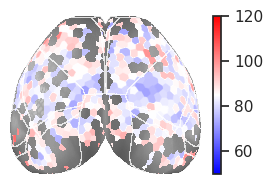

In [56]:
"""bsbo.show(
    x,
    figsize=(3, 2),
    vmin=50,
    vmax=120,
    mask_thresh=None,
    cmap='bwr',
    cbar=True,
    layer=2,
);"""

In [38]:
surface_regions = mice.node_lookup['ca2'].values()
surface_regions = np.array(list(surface_regions))

In [39]:
brain = reg.load_obj_masks('sub-SLC01_ses-3', 'brain')
brain = brain['brain']
len(unique_idxs(brain.numpy()))

5886

In [40]:
in_brain = set(surface_regions).intersection(unique_idxs(brain.numpy()))
in_brain = sorted(in_brain)

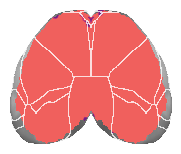

In [41]:
x = np.zeros(len(mice.node_lookup['ca2'])) + 0.5
for n, i in mice.node_lookup['ca2'].items():
    if i in in_brain:
        x[n] = 1
bs.show(x, vmin=0, vmax=1.5);

In [42]:
from register.register import _erode_post
eroded = _erode_post(brain)

In [43]:
in_eroded = set(surface_regions).intersection(unique_idxs(eroded.numpy()))
in_eroded = sorted(in_eroded)

In [44]:
len(in_brain), len(in_eroded)

(528, 528)

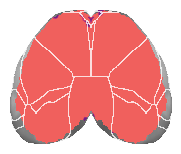

In [45]:
x = np.zeros(len(mice.node_lookup['ca2'])) + 0.5
for n, i in mice.node_lookup['ca2'].items():
    if i in in_eroded:
        x[n] = 1
bs.show(x, vmin=0, vmax=1.5);

In [46]:
(brain.numpy() > 0).sum(), (eroded.numpy() > 0).sum()

(38826, 17145)

In [47]:
eroded_from_file = reg.load_obj_masks('sub-SLC01_ses-3', 'eroded')
eroded_from_file = eroded_from_file['eroded']
len(unique_idxs(eroded_from_file.numpy()))

5886

In [48]:
in_eroded_from_file = set(surface_regions).intersection(unique_idxs(eroded_from_file.numpy()))
in_eroded_from_file = sorted(in_eroded_from_file)

In [49]:
len(in_brain), len(in_eroded), len(in_eroded_from_file)

(528, 528, 528)

In [50]:
brain_eroded_from_file = reg.load_obj_masks('sub-SLC01_ses-3', 'brain-eroded')
brain_eroded_from_file = brain_eroded_from_file['brain-eroded']
len(unique_idxs(brain_eroded_from_file.numpy()))

2333

In [51]:
a = set(surface_regions).intersection(unique_idxs(brain_eroded_from_file.numpy()))
a = sorted(a)

In [52]:
len(in_brain), len(in_eroded), len(in_eroded_from_file), len(a)

(528, 528, 528, 107)